In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
path = r"C:\Users\USER\Desktop\real_estate_analysis\Real_Estate_Sales_2001-2020_GL.csv"
raw_data = pd.read_csv(path,low_memory=False)

In [3]:
#create a copy of the database to work with and to keep the original
data = raw_data.copy()

In [4]:
#replace all spaces in column names with underscore 
new_columns = []
for column in raw_data.columns:
    column = column.replace(' ','_')
    new_columns.append(column)
data.columns = new_columns    
data.columns = new_columns    

In [5]:
#creating a better serial numbering
data['Serial_Number'] = list(range(0,len(data)))
data['Serial_Number'] = data['Serial_Number'].astype(str)
def zero_fill(number):
    return number.zfill(len('997212'))
data['Serial_Number'] = data['Serial_Number'].apply(zero_fill)

In [6]:
data.dropna(subset = ['Date_Recorded','Sale_Amount'],inplace=True)

In [7]:
bin_width = 100000
max_value = data['Sale_Amount'].max()  #maximum value in your data

#number of bins based on the bin width
num_bins = int(max_value / bin_width) + 1

#bin edges and labels dynamically
bins = [i * bin_width for i in range(num_bins)]
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(num_bins-1)] + [f"{bins[-1]}+"]

data['sales_bins'] = pd.cut(data['Sale_Amount'], bins=bins + [float('inf')], labels=labels)

In [8]:
data['Date_Recorded'] = pd.to_datetime(data['Date_Recorded'])

data['Recorded_Year'] = data['Date_Recorded'].dt.year.astype(int)
data['Recorded_Month'] = data['Date_Recorded'].dt.month.astype(int)


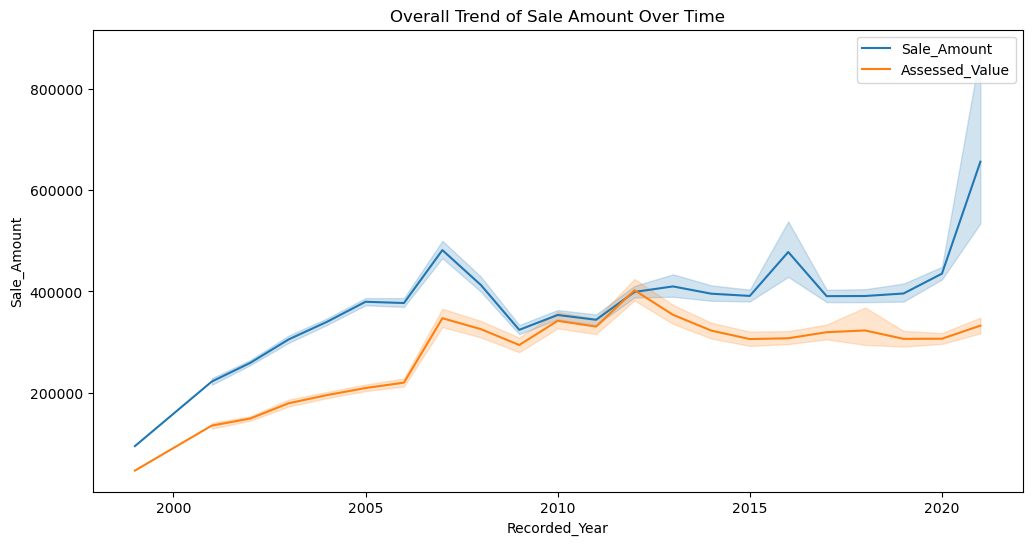

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Recorded_Year', y='Sale_Amount',label = "Sale_Amount")
sns.lineplot(data=data, x='Recorded_Year', y='Assessed_Value',label = "Assessed_Value")
plt.legend()
plt.title('Overall Trend of Sale Amount Over Time')

plt.show()

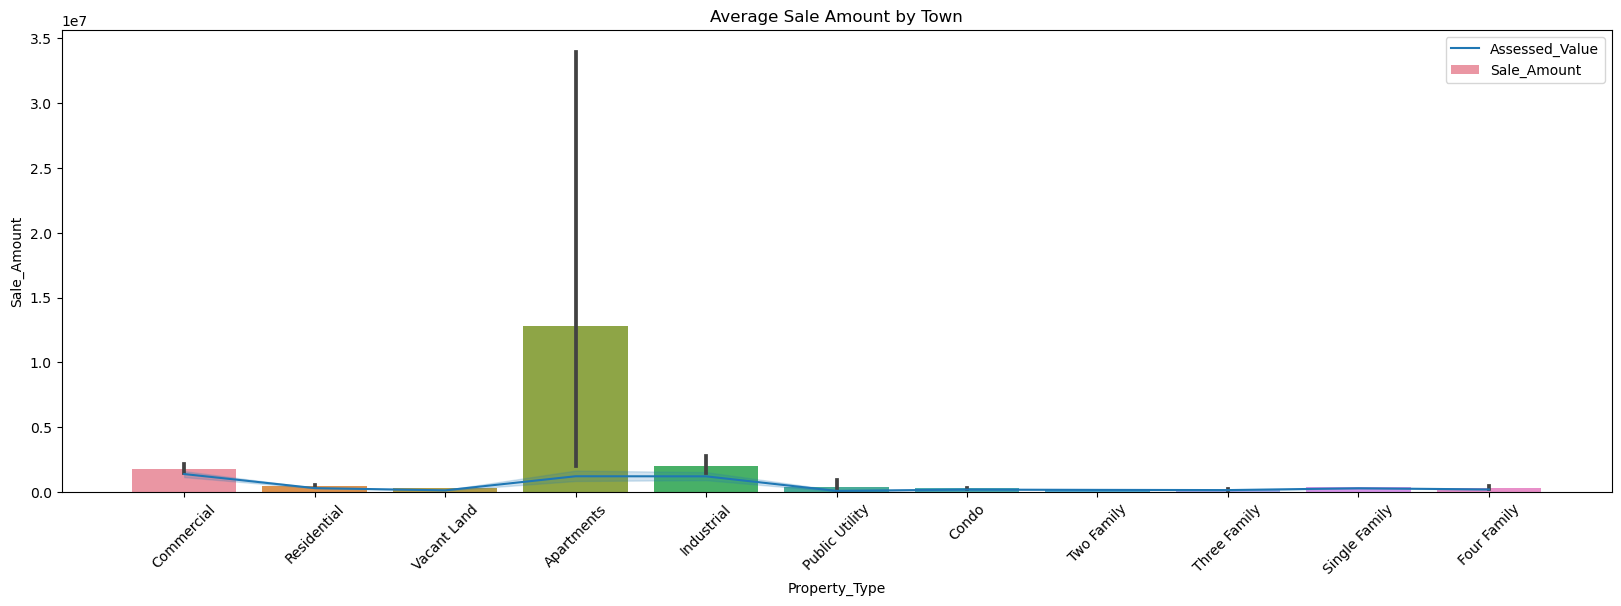

In [30]:
plt.figure(figsize=(20, 6))

sns.barplot(x='Property_Type', y='Sale_Amount', data=data, estimator=np.mean,label = 'Sale_Amount' )
sns.lineplot(x='Property_Type', y='Assessed_Value', data=data, estimator=np.mean,label = 'Assessed_Value')
plt.xticks(rotation=45)
plt.title('Average Sale Amount by Town')
plt.show()

In [2]:
cd 

'C:\\Users\\USER'